<a href="https://www.kaggle.com/code/hamedetezadi/affair-prediction?scriptVersionId=91861053" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# We will be predicting, the number of affairs a person might have, interesting right ;)
# Note that the affairs column is a float type and not an int type. So we are to assume the round off value.

In [3]:
affairs = pd.read_csv("../input/kmeans-test/affairs.csv")
affairs.head()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
affairs.shape

(6366, 10)

In [5]:
affairs.isnull().sum()

Unnamed: 0         0
rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [6]:
affairs = affairs.drop(['Unnamed: 0'], axis = 1)

In [7]:
def wholeNumber(x):
  return int(x + 0.5)

affairs['affairs'] = affairs['affairs'].map(wholeNumber)

In [8]:
affairs.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3


<AxesSubplot:>

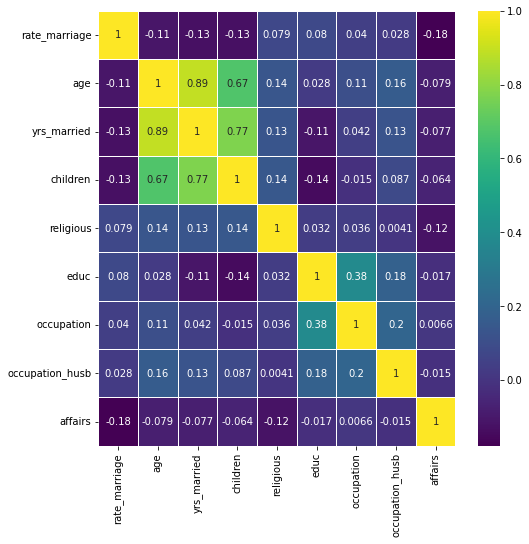

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(affairs.corr(),annot=True,cmap='viridis',linewidths=.5)

In [10]:
# From the above graph, we can see that there is a high correlation between columns like age and years_married or years_married and children
# the person is a parent of.
# Now if we have to remove the dimensions of the data, to make it more compact without losing on much information we can remove
# years_married column.

In [11]:
# Gaining more insight on the data:

affairs.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.697769
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.218132
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,58.000000


In [12]:
# We can see that ranges for different columns that are related to different aspects of a people and his/her qualifications.
# We can even see that the mean is 0.69 for affairs, while more than 50 percentile have not committed Adultery.

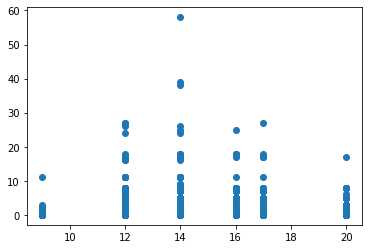

In [13]:
plt.scatter(affairs['educ'], affairs['affairs'], cmap='viridis')

In [14]:
# This shows that with education of level 14 on a scale of (9(lowest) to 20(highest)) most people cheat.
# What is even more suprising is that people on level 20 in education too cheat but the intensity is moderate,
# while on level 10 and 18 of education nobody cheated (loyal people are at level 10 and 18 guys and gals).

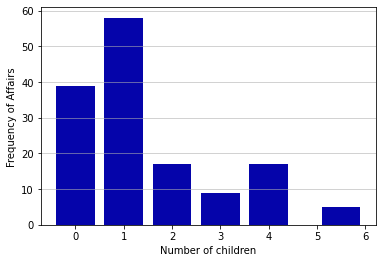

In [15]:
# Histograms

plt.bar(affairs['children'],  affairs['affairs'], color='#0504aa')
plt.grid(axis='y', alpha=0.7)
plt.xlabel('Number of children')
plt.ylabel('Frequency of Affairs')
plt.show()

In [16]:
# Again quite a suprise that  a person with a child had the highest affair count.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='affairs'>

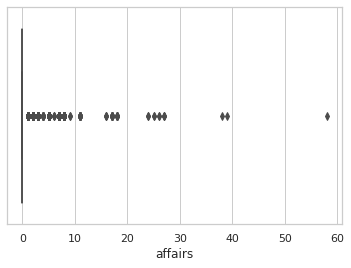

In [17]:
sns.set_theme(style="whitegrid")
sns.boxplot(affairs['affairs'])

In [18]:
# This shows that the data is filled with zeros and will cause error later on as the data is imbalanced.
# To fix this we will remove most of all the zero values in affairs column.

affairs_zero = affairs[affairs['affairs'] == 0]
affairs = affairs[affairs['affairs'] > 0]

In [19]:
affairs_zero.shape

(4788, 9)

In [20]:
affairs = affairs.append(affairs_zero.iloc[:500])

affairs.reset_index(inplace = True, drop = True)
affairs.tail(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2075,3.0,27.0,9.0,0.0,2.0,16.0,5.0,2.0,0
2076,4.0,27.0,2.5,1.0,3.0,14.0,3.0,5.0,0
2077,5.0,22.0,2.5,0.0,1.0,12.0,3.0,4.0,0


In [21]:
affairs.shape

(2078, 9)

In [22]:
affairs['children'].value_counts()

2.0    612
0.0    515
1.0    417
3.0    321
4.0    133
5.5     80
Name: children, dtype: int64

In [23]:
affairs['educ'].value_counts()

14.0    818
12.0    728
16.0    279
17.0    143
20.0     89
9.0      21
Name: educ, dtype: int64

In [24]:
# Moving on we look for categorical data types

affairs['rate_marriage'].value_counts()

4.0    733
3.0    550
5.0    500
2.0    221
1.0     74
Name: rate_marriage, dtype: int64

In [25]:
affairs['religious'].value_counts()

2.0    830
3.0    716
1.0    412
4.0    120
Name: religious, dtype: int64

In [26]:
affairs['occupation'].value_counts()

3.0    978
4.0    484
5.0    313
2.0    256
6.0     40
1.0      7
Name: occupation, dtype: int64

In [27]:
affairs['occupation_husb'].value_counts()

4.0    649
5.0    608
2.0    435
3.0    173
6.0    165
1.0     48
Name: occupation_husb, dtype: int64

In [28]:
# Frankly you can say that these are categorical data, since they are in the form on munbers, they can be easily processed

plat_new = pd.get_dummies(affairs['rate_marriage'], prefix = 'rate')
dev_new = pd.get_dummies(affairs['religious'], prefix = 'religion')
rat_new = pd.get_dummies(affairs['occupation'], prefix = 'occ') 
rat_new = pd.get_dummies(affairs['occupation_husb'], prefix = 'husb_occ')
y = affairs['affairs']

affairs = pd.concat([affairs, plat_new, dev_new, rat_new], axis = 1)
X = affairs.drop(['affairs', 'rate_marriage', 'religious', 'occupation_husb'], axis = 1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [30]:
X.shape

(2078, 20)

In [31]:
X.head()

,age,yrs_married,children,educ,occupation,rate_1.0,rate_2.0,rate_3.0,rate_4.0,rate_5.0,religion_1.0,religion_2.0,religion_3.0,religion_4.0,husb_occ_1.0,husb_occ_2.0,husb_occ_3.0,husb_occ_4.0,husb_occ_5.0,husb_occ_6.0
0,27.0,13.0,3.0,14.0,3.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,22.0,2.5,0.0,16.0,3.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,37.0,16.5,4.0,16.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,27.0,9.0,1.0,14.0,3.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,27.0,9.0,0.0,14.0,3.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [32]:
pca = PCA(n_components = 15)
pca_fit = pca.fit_transform(X)

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit, y, test_size=0.2, random_state = 1)

In [34]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 0, n_jobs = -1)

In [35]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

82.19 %


In [36]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('Affairs.pickle','wb'))

In [37]:
saved_pca = pickle.dump(pca, open('AffairsPCA.pickle','wb'))